# Clustering con K-means

Después de completar este laboratorio, podrás:

Usar el clustering K-means de Scikit-Learn para agrupar datos.

Aplicar K-means en un conjunto de datos del mundo real para la segmentación de clientes.

## Introducción

K-means se utiliza ampliamente para clustering en muchas aplicaciones de ciencia de datos. Es especialmente útil si necesitas descubrir rápidamente información a partir de datos sin etiquetar.

Algunas aplicaciones del mundo real de K-means incluyen:

Segmentación de clientes

Comprender qué intentan lograr los visitantes de un sitio web

Reconocimiento de patrones

Ingeniería de características

Compresión de datos

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<h1 id="random_generated_dataset">K-Means en un conjunto de datos sintético</h1>

¡Vamos a crear nuestro propio conjunto de datos para este laboratorio!

Primero, necesitamos establecer una semilla aleatoria.
Usa la función numpy.random.seed(), estableciendo la semilla en 0.

In [ ]:
np.random.seed(0)

A continuación, vamos a crear clústeres aleatorios de puntos usando la clase make_blobs. La clase make_blobs puede recibir muchos parámetros, pero utilizaremos los siguientes específicos:

<br>

<u>Entrada</u>

n_samples: Número total de puntos divididos equitativamente entre los clústeres.

Valor: 5000

centres: Número de centros a generar, o las ubicaciones fijas de los centros.

Valor: [[4, 4], [-2, -1], [2, -3], [1,1]]

cluster_std: Desviación estándar de los clústeres.

Valor: 0.9

<br>

<u>Salida</u>

X: Array de forma [n_samples, n_features]. (Matriz de características)

Las muestras generadas.

y: Array de forma [n_samples]. (Vector de respuesta)

Las etiquetas enteras que indican la pertenencia de cada muestra a un clúster.

In [3]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

Muestra el diagrama de dispersión (scatter plot) de los datos generados aleatoriamente.

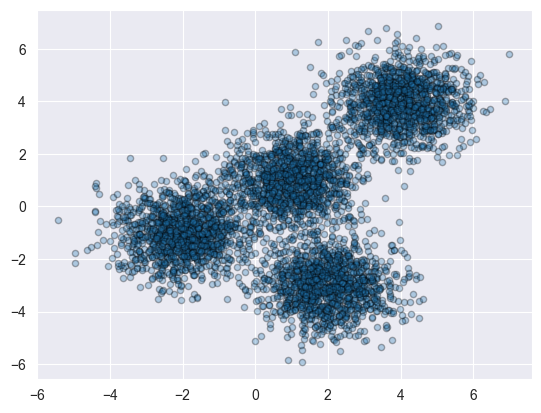

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker='.',alpha=0.3,ec='k',s=80)

<h2 id="setting_up_K_means">Configurando K-means</h2>

Ahora que tenemos nuestros datos aleatorios, vamos a configurar nuestro clustering K-means.

La clase KMeans tiene muchos parámetros que se pueden usar, pero utilizaremos estos tres:

init: Método de inicialización de los centroides.

Valor: k-means++

k-means++: Selecciona los centros iniciales de los clústeres de manera inteligente para acelerar la convergencia del algoritmo K-means.

n_clusters: Número de clústeres a formar y, por lo tanto, número de centroides a generar.

Valor: 4 (ya que tenemos 4 centros)

n_init: Número de veces que el algoritmo K-means se ejecutará con diferentes semillas de los centroides. El resultado final será la mejor salida de las n_init ejecuciones consecutivas en términos de inercia.

Valor: 12

Inicializa KMeans con estos parámetros, donde la variable de salida se llamará k_means.

In [6]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

Ahora vamos a ajustar el modelo KMeans con la matriz de características que creamos anteriormente, X.

In [7]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

Ahora vamos a obtener la etiqueta de cada punto en el modelo usando el atributo k_means.labels_ y guardarlas como k_means_labels.

In [8]:
k_means_labels = k_means.labels_
k_means_labels

array([3, 1, 1, ..., 0, 0, 0], shape=(5000,), dtype=int32)

También obtendremos las coordenadas de los centros de los clústeres usando k_means.cluster_centers_ y las guardaremos como k_means_cluster_centers.

In [9]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 1.98388404, -3.01259465],
       [ 4.00418296,  3.96200686],
       [-2.00924047, -1.01148436],
       [ 1.00264325,  1.02013186]])

<h2 id="creating_visual_plot">Creando el Gráfico Visual</h2>

Ahora que tenemos los datos aleatorios generados y el modelo K-means inicializado, ¡vamos a graficar el resultado y ver cómo se ve!

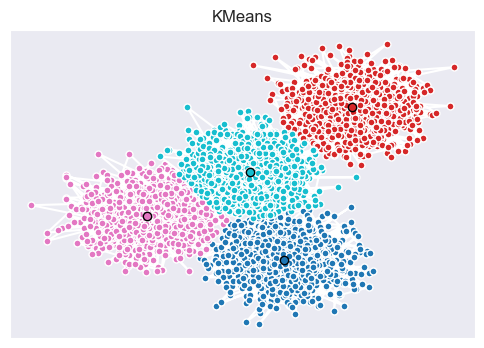

In [10]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

Ejercicio 1

Intenta agrupar el conjunto de datos anterior en un número diferente de clústeres, por ejemplo, k = 3. Observa la diferencia en el patrón generado.

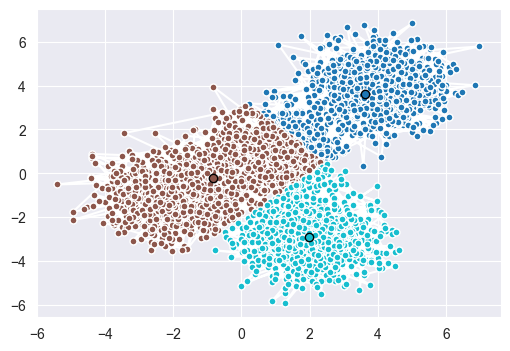

In [11]:
k_means3 = KMeans(init="k-means++", n_clusters=3, n_init=12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

### Exercise 2
Intenta lo mismo pero con k=5.

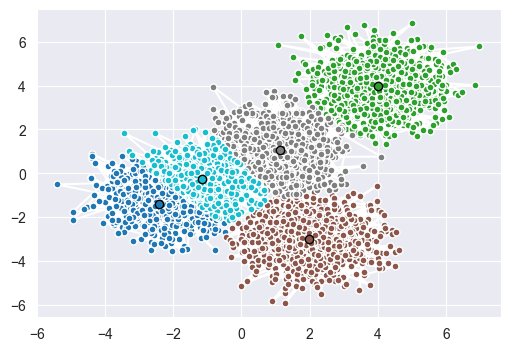

In [12]:
k_means3 = KMeans(init="k-means++", n_clusters=5, n_init=12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

Ejercicio 3

Comenta sobre la suma de cuadrados dentro del clúster (inercia) de los clústeres creados para k = 3 y k = 5.

Para k = 3, el valor de la suma de cuadrados dentro del clúster será mayor que para k = 4, ya que los puntos de diferentes clústeres naturales se agrupan juntos, lo que conduce a un subajuste (underfitting) del modelo K-means.

Para k = 5, el valor será menor que para k = 4, ya que los puntos se distribuyen en más clústeres de los necesarios, lo que conduce a un sobreajuste (overfitting) del modelo K-means.

<h1 id="customer_segmentation_K_means">Segmentación de Clientes con K-means</h1>

Imagina que tienes un conjunto de datos de clientes y necesitas aplicar segmentación de clientes a estos datos históricos.

La segmentación de clientes es la práctica de dividir una base de clientes en grupos de individuos que tienen características similares. Es una estrategia importante, ya que una empresa puede dirigirse a estos grupos específicos de clientes y asignar recursos de marketing de manera efectiva.

Por ejemplo, un grupo podría contener clientes que sean altamente rentables y de bajo riesgo, o que tengan más probabilidad de comprar productos o suscribirse a un servicio. Una tarea empresarial es retener a esos clientes.

In [13]:
cust_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
cust_df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


<h2 id="pre_procesamiento">Pre-procesamiento</h2

Como puedes ver, Address en este conjunto de datos es una variable categórica.
El algoritmo K-means no funciona directamente con variables categóricas, ya que la función de distancia euclidiana no tiene sentido para ellas.

Podrías codificar la variable categórica en one-hot, pero con fines ilustrativos, vamos a ejecutar el clustering K-means sin hacerlo.

In [14]:
cust_df = cust_df.drop('Address', axis=1)

In [15]:
cust_df = cust_df.dropna()
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      700 non-null    int64  
 1   Age              700 non-null    int64  
 2   Edu              700 non-null    int64  
 3   Years Employed   700 non-null    int64  
 4   Income           700 non-null    int64  
 5   Card Debt        700 non-null    float64
 6   Other Debt       700 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


Después de eliminar los valores NaN, todavía tenemos 700 filas de las originales 849.
Procedamos con este conjunto de datos más pequeño.

#### Normalización usando la desviación estándar

Ahora vamos a normalizar el conjunto de datos. Pero, ¿por qué necesitamos la normalización en primer lugar?

La normalización es un método estadístico que ayuda a los algoritmos basados en matemáticas a interpretar las características con diferentes magnitudes y distribuciones de manera equitativa, transformando las características para que tengan media cero y desviación estándar igual a uno.

Usamos StandardScaler() para normalizar, o estandarizar, nuestro conjunto de datos.

In [16]:
X = cust_df.values[:,1:] # leaves out `Customer ID`
Clus_dataSet = StandardScaler().fit_transform(X)

<h2 id="modelado">Modelado</h2>

### Ejercicio 4

Escribe el código para agrupar los datos con k = 3.
Extrae las etiquetas de los clústeres de este proceso de clustering.

In [17]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

<h2 id="insights">Insights</h2>

Asignamos las etiquetas de clústeres de K-means a cada fila del dataframe.

In [18]:
cust_df["Clus_km"] = labels

Podemos verificar fácilmente los valores de los centroides promediando las características en cada clúster.
Estos valores indican el punto central del clúster desde la perspectiva de cada variable considerada.

In [19]:
cust_df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,439.80226,32.775895,1.632768,6.169492,30.642185,1.003795,2.090910,0.284369,10.146893
1,374.00000,44.785714,3.000000,17.857143,219.714286,6.115429,11.546357,0.285714,8.064286
2,403.56129,41.103226,1.916129,15.135484,81.122581,3.024935,5.605258,0.180645,10.848387


Ahora, veamos la distribución de los clientes según su educación, edad e ingresos.
Podemos elegir visualizar esto como un diagrama de dispersión 2D con:

Edad (Age) en el eje x,

Ingresos (Income) en el eje y,

y el tamaño del marcador representando la educación.

Los puntos del scatter tendrán colores diferentes según las distintas etiquetas de clase.

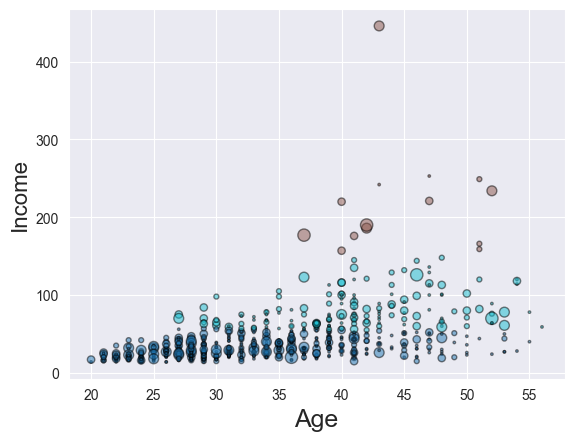

In [20]:
area = np.pi * ( X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), cmap='tab10', ec='k',alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

También podemos ver esta distribución en 3 dimensiones para una mejor comprensión.
Aquí, el parámetro educación representará el tercer eje, en lugar del tamaño del marcador.

In [21]:
# Create interactive 3D scatter plot
fig = px.scatter_3d(X, x=1, y=0, z=3, opacity=0.7, color=labels.astype(float))

fig.update_traces(marker=dict(size=5, line=dict(width=.25)), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800, scene=dict(
        xaxis=dict(title='Education'),
        yaxis=dict(title='Age'),
        zaxis=dict(title='Income')
    ))  # Remove color bar, resize plot

fig.show()


K-means dividirá a tus clientes en grupos mutuamente excluyentes, por ejemplo, en 3 clústeres.
Los clientes de cada clúster son demográficamente similares entre sí.

### Ejercicio 5

Crea un perfil para cada grupo, considerando las características comunes de cada clúster según tus observaciones.

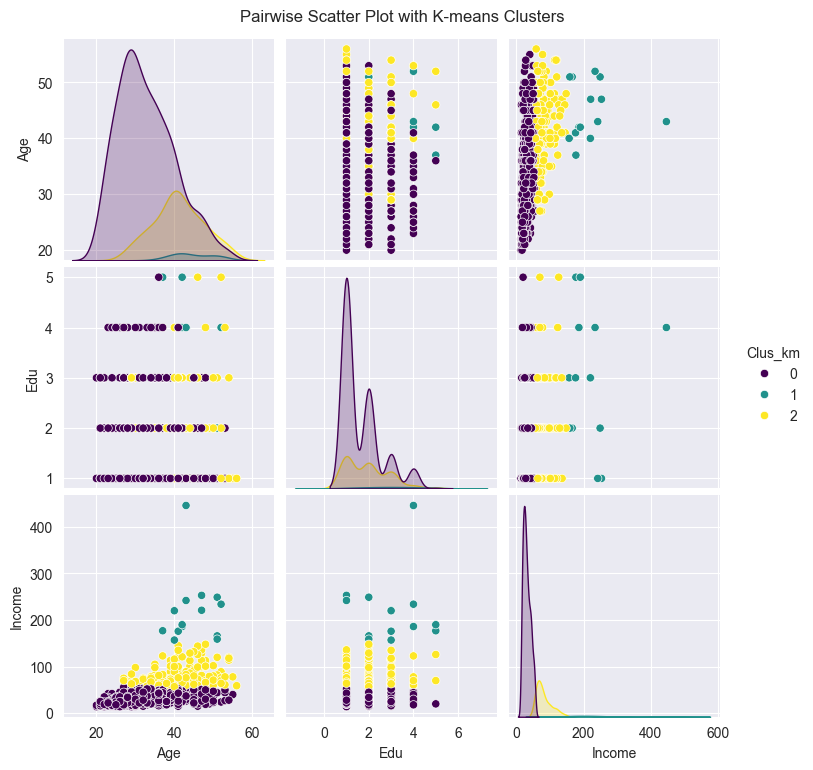

In [22]:
cust_df_sub = cust_df[['Age', 'Edu','Income','Clus_km']].copy()
sns.pairplot(cust_df_sub, hue='Clus_km', palette='viridis', diag_kind='kde')
plt.suptitle('Pairwise Scatter Plot with K-means Clusters', y=1.02)
plt.show()